# Spark SQL
O Spark SQL é usado para acessar dados estruturados com Spark.

Acesse http://localhost:4040 sempre que quiser acompanhar a execução dos jobs.

## Spark SQL e RDD's

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [2]:
print(sc)

<SparkContext master=local[2] appName=PySparkShell>


In [3]:
# Spark Session - usada quando se trabalha com Dataframes no Spark
spSession = SparkSession.builder.master("local").appName("DSA-SparkSQL").config("spark.some.config.option", "some-value").getOrCreate()

22/07/13 20:37:23 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Criando o SQL Context para trabalhar com Spark SQL
sqlContext = SQLContext(sc)

/home/lucas/spark-3.3.0-bin-hadoop3/python/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [5]:
# Importando o arquivo e criando um RDD
linhasRDD1 = sc.textFile("carros.csv")

In [6]:
linhasRDD1.count()

198

In [7]:
# Removendo a primeira linha - Transformação 1
linhasRDD2 = linhasRDD1.filter(lambda x: "FUELTYPE" not in x)

In [8]:
linhasRDD2.count()

197

In [9]:
# Dividindo o conjunto de dados em colunas - Transformação 2
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [10]:
# Dividindo o conjunto de dados em colunas - Transformação 3
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [11]:
linhasRDD4.collect()

[Row(make='subaru', body='hatchback', hp=69),
 Row(make='chevrolet', body='hatchback', hp=48),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=60),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='mazda', body='hatchback', hp=68),
 Row(make='mitsubishi', body='hatchback', hp=68),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='plymouth', body='hatchback', hp=68),
 Row(make='chevrolet', body='hatchback', hp=70),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='dodge', body='hatchback', hp=68),
 Row(make='honda', body='hatchback', hp=58),
 Row(make='toyota', body='hatchback', hp=62),
 Row(make='honda', body='hatchback', hp=76),
 Row(make='chevrolet', body='sedan', hp=70),
 Row(make='nissan', body='sedan', hp=69),
 Row(make='mitsubishi', body='hat

In [12]:
# Criando um dataframe a partir do RDD
df = spSession.createDataFrame(linhasRDD4)

In [13]:
df.show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [14]:
df.select('*').show()

+----------+---------+---+
|      make|     body| hp|
+----------+---------+---+
|    subaru|hatchback| 69|
| chevrolet|hatchback| 48|
|     mazda|hatchback| 68|
|    toyota|hatchback| 62|
|mitsubishi|hatchback| 68|
|     honda|hatchback| 60|
|    nissan|    sedan| 69|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
|     mazda|hatchback| 68|
|mitsubishi|hatchback| 68|
|     dodge|hatchback| 68|
|  plymouth|hatchback| 68|
| chevrolet|hatchback| 70|
|    toyota|hatchback| 62|
|     dodge|hatchback| 68|
|     honda|hatchback| 58|
|    toyota|hatchback| 62|
|     honda|hatchback| 76|
| chevrolet|    sedan| 70|
+----------+---------+---+
only showing top 20 rows



In [15]:
type(df)

pyspark.sql.dataframe.DataFrame

In [16]:
df.orderBy('make').show()

+-----------+-----------+---+
|       make|       body| hp|
+-----------+-----------+---+
|alfa-romero|  hatchback|154|
|alfa-romero|convertible|111|
|alfa-romero|convertible|111|
|       audi|      sedan|110|
|       audi|      sedan|115|
|       audi|      sedan|110|
|       audi|      wagon|110|
|       audi|      sedan|140|
|       audi|      sedan|102|
|        bmw|      sedan|101|
|        bmw|      sedan|101|
|        bmw|      sedan|121|
|        bmw|      sedan|121|
|        bmw|      sedan|182|
|        bmw|      sedan|182|
|        bmw|      sedan|121|
|        bmw|      sedan|182|
|  chevrolet|      sedan| 70|
|  chevrolet|  hatchback| 70|
|  chevrolet|  hatchback| 48|
+-----------+-----------+---+
only showing top 20 rows



In [17]:
# Registrando o dataframe como uma Temp Table
df.createOrReplaceTempView('linhasTB')

In [18]:
# Executando queries SQL ANSI
spSession.sql("select * from linhasTB where make ='nissan' ").show()

+------+---------+---+
|  make|     body| hp|
+------+---------+---+
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 69|
|nissan|    sedan| 55|
|nissan|    sedan| 69|
|nissan|    wagon| 69|
|nissan|    sedan| 69|
|nissan|hatchback| 69|
|nissan|    wagon| 69|
|nissan|  hardtop| 69|
|nissan|hatchback| 97|
|nissan|    sedan| 97|
|nissan|    sedan|152|
|nissan|    sedan|152|
|nissan|    wagon|152|
|nissan|hatchback|160|
|nissan|hatchback|160|
|nissan|hatchback|200|
+------+---------+---+



In [19]:
# Executando queries SQL ANSI
spSession.sql("select make, body, avg(hp) from linhasTB group by make, body").show()

+----------+---------+-----------------+
|      make|     body|          avg(hp)|
+----------+---------+-----------------+
|    nissan|    wagon|96.66666666666667|
|    subaru|    sedan|             90.2|
|  plymouth|    sedan|             68.0|
|     dodge|hatchback|             90.2|
|    nissan|    sedan|             89.0|
|     honda|    sedan|             89.8|
|mitsubishi|hatchback|            105.0|
|     mazda|    sedan|82.66666666666667|
|  plymouth|    wagon|             88.0|
|     mazda|hatchback|             89.4|
| chevrolet|    sedan|             70.0|
|     honda|    wagon|             76.0|
|     dodge|    sedan|             68.0|
|     isuzu|    sedan|             78.0|
|     dodge|    wagon|             88.0|
|    subaru|hatchback|71.66666666666667|
|    toyota|    wagon|             85.5|
|    toyota|    sedan|             86.1|
|    toyota|hatchback|             93.0|
| chevrolet|hatchback|             59.0|
+----------+---------+-----------------+
only showing top

# Spark SQL e Arquivos CSV

In [20]:
carrosDF = spSession.read.csv('carros.csv', header = True)

In [21]:
type(carrosDF)

pyspark.sql.dataframe.DataFrame

In [22]:
carrosDF.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [23]:
# Registrando o dataframe como uma Temp Table
carrosDF.createOrReplaceTempView('carrosTB')

In [24]:
# Executando queries SQL ANSI
spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'").show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



In [25]:
carrosTT = spSession.sql("select make, hp, price from carrosTB where CYLINDERS = 'three'")

In [26]:
carrosTT.show()

+---------+---+-----+
|     make| hp|price|
+---------+---+-----+
|chevrolet| 48| 5151|
+---------+---+-----+



# Aplicando Machine Learning

In [27]:
# Carregando o arquivo CSV e mantendo o objeto em cache
carros = sc.textFile("carros.csv")
carros.cache()

carros.csv MapPartitionsRDD[46] at textFile at NativeMethodAccessorImpl.java:0

In [28]:
# Remove a primeira linha (header)
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [29]:
# Importando função row e função vectores
from pyspark.sql import Row
from pyspark.ml.linalg import Vectors
import math

In [30]:
# Convertendo para um vetor de linhas
def transformToNumeric(inputStr):
    attList = inputStr.split(",")
    doors = 1.0 if attList[3] == "two" else 2.0
    body = 1.9 if attList[4] == "sedan" else 2.0
    
        # Filtrando colunas não necessárias nesta etapa
    valores = Row(DOORS = doors, BODY = float(body), HP = float(attList[7]), RPM = float(attList[8]), MPG = float(attList[9]))
    return valores

In [31]:
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(DOORS=1.0, BODY=2.0, HP=69.0, RPM=4900.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=48.0, RPM=5100.0, MPG=47.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=30.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=35.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=60.0, RPM=5500.0, MPG=38.0),
 Row(DOORS=1.0, BODY=1.9, HP=69.0, RPM=5200.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=37.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5000.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=2.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=70.0, RPM=5400.0, MPG=38.0),
 Row(DOORS=1.0, BODY=2.0, HP=62.0, RPM=4800.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=68.0, RPM=5500.0, MPG=31.0),
 Row(DOORS=1.0, BODY=2.0, HP=58.0, RPM=4800.0, MPG=49.0),
 Row(DOORS=2.0

In [32]:
# Criando um Dataframe
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+-----+----+----+------+----+
|DOORS|BODY|  HP|   RPM| MPG|
+-----+----+----+------+----+
|  1.0| 2.0|69.0|4900.0|31.0|
|  1.0| 2.0|48.0|5100.0|47.0|
|  1.0| 2.0|68.0|5000.0|30.0|
|  1.0| 2.0|62.0|4800.0|35.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|60.0|5500.0|38.0|
|  1.0| 1.9|69.0|5200.0|31.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5500.0|37.0|
|  1.0| 2.0|68.0|5000.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  2.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|70.0|5400.0|38.0|
|  1.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|68.0|5500.0|31.0|
|  1.0| 2.0|58.0|4800.0|49.0|
|  2.0| 2.0|62.0|4800.0|31.0|
|  1.0| 2.0|76.0|6000.0|30.0|
|  2.0| 1.9|70.0|5400.0|38.0|
+-----+----+----+------+----+
only showing top 20 rows



In [33]:
# Aplicando técnicas de normalização e escala
summStats = carrosDf.describe().toPandas()
medias = summStats.iloc[1,1:5].values.tolist()
desvios_padroes = summStats.iloc[2,1:5].values.tolist()

In [34]:
# Inserindo a média e o desvio padrão em uma variável do tipo broadcast 
bcMedias = sc.broadcast(medias)
bcDesviosP = sc.broadcast(desvios_padroes)

In [35]:
def centerAndScale(inRow) :
    global bcMedias
    global bcDesviosP
    
    meanArray = bcMedias.value
    stdArray = bcDesviosP.value

    retArray = []
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[i]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)

In [36]:
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([-1.145, 0.9337, -0.9194, -0.4532]),
 DenseVector([-1.145, 0.9337, -1.4773, -0.0375]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.1585, 0.7941]),
 DenseVector([-1.145, -1.0656, -0.9194, 0.1704]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.9459, -0.2453]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([0.869, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -0.8928, 0.5862]),
 DenseVector([-1.145, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.9459, 0.7941]),
 DenseVector([-1.145, 0.9337, -1.2116, -0.6611]),
 DenseVector([0.869, 0.9337, -1.1053, -0.6611]),
 DenseVector([-1.145, 0.9337, -0.7334, 1.8335]),
 DenseVector([0.869, -1.0656, -0.8928, 0.5862]),
 DenseVector([

In [37]:
# Criando um Spark Dataframe
autoRows = csAuto.map(lambda f:Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(10)

+--------------------+
|            features|
+--------------------+
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
|[-1.1449709581789...|
+--------------------+
only showing top 10 rows



In [38]:
# Importando o algoritmo K-Means para clusterização
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k = 3, seed = 1)
modelo = kmeans.fit(autoDf)
previsoes = modelo.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         0|
|[-1.1449709581789...|         0|
|[0.86895117361793...|         1|
+--------------------+----------+
only showing top 20 rows



In [39]:
# Plot dos resultados
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [40]:
def unstripData(instr) :
    return ( instr["prediction"], instr["features"][0], instr["features"][1],instr["features"][2],instr["features"][3])

In [41]:
# Organizando os dados para o Plot
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

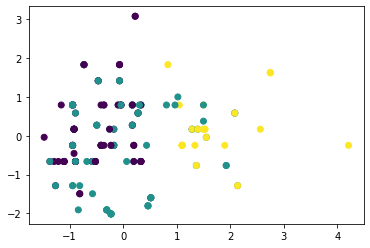

In [42]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])